In [1]:
# import all the libraries
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# let us fetch the mnist_784 dataset
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y = mnist["data"],mnist["target"]
print(X.shape)
print(y.shape)
# there are 70,000 images with 784 features each
# 784 because they are 28x28 pixels
# where each pixel is a value from 0(white) to 255(black)

(70000, 784)
(70000,)


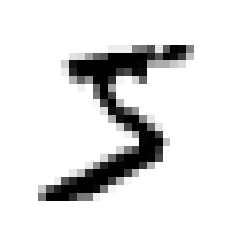

5


In [4]:
# let us look at one image
temp = np.array(X.iloc[0])
temp_image = temp.reshape(28,28)

plt.imshow(temp_image, cmap="binary")
plt.axis("off")
plt.show()
print(y[0])
# The image looks like the number 5
# we can confirm this by looking at the label, which does say 5

In [5]:
# cast the label into an integer for the ML model
y = y.astype(np.uint8)

In [6]:
# Now we will split our dataset into train and test
# This dataset is already shuffled, so we can split it immediately
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

Binary Classification 

In [7]:
# let us first test a binary classifier for the number 2
# for this, we will use Stochastic Gradient Descent(SGD) classifier

y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_2)

# test it for a known 2 value
sgd_clf.predict([np.array(X.iloc[5])])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

In [8]:
# we will now evaluate the model's accuracy using a confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3)
confusion_matrix(y_train_2,y_train_pred)
# 51538 were false negatives, and 5050 were true positives

array([[51538,  2504],
       [  908,  5050]])

In [9]:
# we will test its precision score and recall score

print("Precision score:",precision_score(y_train_2, y_train_pred))
print("Recall score:",recall_score(y_train_2, y_train_pred))

# Here we can see that our model has an accuracy of only 67%
# and it was able to detect 85% of the 2s in our dataset

Precision score: 0.6685199894095843
Recall score: 0.8475998657267539


In [10]:
# we can combine these two metrics into a single value
# for this, we will use F1 score

f1_score(y_train_2, y_train_pred)

# The overall accuracy is about 75%
# The f1 score is high if both precision and recall are high
# but this is not possible as increasing precision decreases recall and vice versa
# this is called the precision/recall trade-off

0.7474837181764358

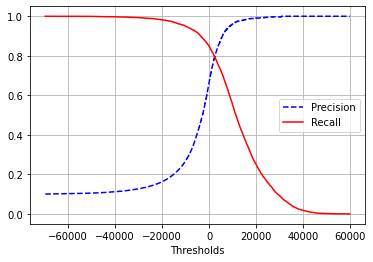

In [11]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3,
                            method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

def precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "r-", label="Recall")
    plt.legend(loc="right")
    plt.xlabel("Thresholds")
    plt.grid(True)

precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Multiclass Classification

In [12]:
# We will try using SVC with the scaled data
svm_clf = SVC(C=5)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train.astype(np.float32))
svm_clf.fit(X_scaled, y_train)

SVC(C=5)

In [13]:
# Testing it on the test set
X_test_scaled = scaler.transform(X_test.astype(np.float32))
y_pred = svm_clf.predict(X_test_scaled)
print("Overall accuracy:",accuracy_score(y_test, y_pred))
# This is great accuracy

Overall accuracy: 0.9727
